In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

if os.name == 'nt':
    import sys
    sys.path.append('C:\\Users\\manojselvam\\Anaconda3\\envs\\py3\\lib\\site-packages\\')


import cv2
import glob
import pickle
import os
import matplotlib.image as mpimg
from skimage import data, filters, io
import skimage 
import scipy
from collections import deque
from tqdm import tqdm
from moviepy.editor import VideoFileClip


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets

In [3]:
%matplotlib inline

In [4]:
# Load a pickle file
def load_pickle(file_path):
    with open(file_path, mode='rb') as f:
        file_data = pickle.load(f)
        return file_data;


# Create a pickle
def create_pickle(file_path, data):
    pickle.dump(data, open(file_path, "wb"))
    print("Data saved in", file_path)

In [5]:
def display_images(rows,cols,images,labels,rnd=False):
    gs1 = gridspec.GridSpec(rows,cols)
    gs1.update(wspace=0.01, hspace=0.02)
    plt.figure(figsize=(12,8))
    for i in range(rows * cols):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        rnd_idx = i
        if rnd:
            rnd_idx = np.random.choice(len(images))
            
        plt.text(2,5,
                 str(labels[rnd_idx]),
                 color='k',
                 backgroundcolor='c')
        plt.imshow(images[rnd_idx],cmap="gray")
        plt.axis('off')

    plt.show()

In [6]:
# load and display and image
def load_and_show_img(path):
    img  = cv2.imread(path)
    plt.imshow(img)
    

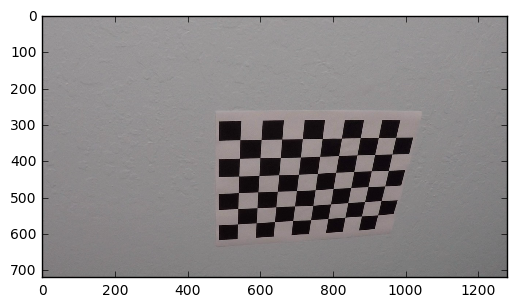

In [7]:
calibration_files = glob.glob("./camera_cal/*.jpg")
chess_board  = cv2.imread(calibration_files[1])
plt.imshow(chess_board)

<function __main__.load_and_show_img>

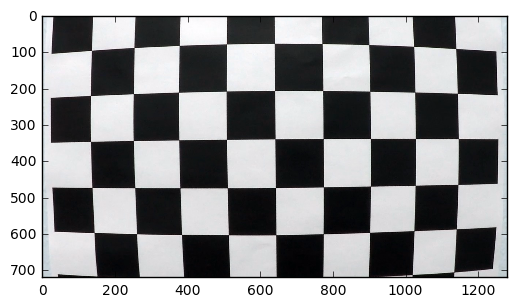

In [8]:
# all calibaration files
interact(load_and_show_img,path=calibration_files)

In [9]:
# Calibrate camera
def calibarate_camera():
    nx = 9 # no of checks width wise
    ny = 6  # no of checks height wise

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    calibration_files = glob.glob("./camera_cal/*.jpg")
    for path in calibration_files:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
        print(path, "Found corners : ", ret)    

        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            # cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            # plt.imshow(img)


    dist_g = cv2.cvtColor(cv2.imread(calibration_files[0]),cv2.COLOR_BGR2GRAY)
    img_size = (dist_g.shape[1],dist_g.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    # pickle the calibration parameters
    calibration = {"mtx":mtx,"dist":dist,"img_size":img_size}
    create_pickle("./calibration.p",calibration)

In [10]:
calibarate_camera()

./camera_cal/calibration1.jpg Found corners :  False
./camera_cal/calibration10.jpg Found corners :  True
./camera_cal/calibration11.jpg Found corners :  True
./camera_cal/calibration12.jpg Found corners :  True
./camera_cal/calibration13.jpg Found corners :  True
./camera_cal/calibration14.jpg Found corners :  True
./camera_cal/calibration15.jpg Found corners :  True
./camera_cal/calibration16.jpg Found corners :  True
./camera_cal/calibration17.jpg Found corners :  True
./camera_cal/calibration18.jpg Found corners :  True
./camera_cal/calibration19.jpg Found corners :  True
./camera_cal/calibration2.jpg Found corners :  True
./camera_cal/calibration20.jpg Found corners :  True
./camera_cal/calibration3.jpg Found corners :  True
./camera_cal/calibration4.jpg Found corners :  False
./camera_cal/calibration5.jpg Found corners :  False
./camera_cal/calibration6.jpg Found corners :  True
./camera_cal/calibration7.jpg Found corners :  True
./camera_cal/calibration8.jpg Found corners :  Tru

In [12]:
calibration_files = glob.glob("./camera_cal/*.jpg")
calibration = load_pickle("calibration.p")

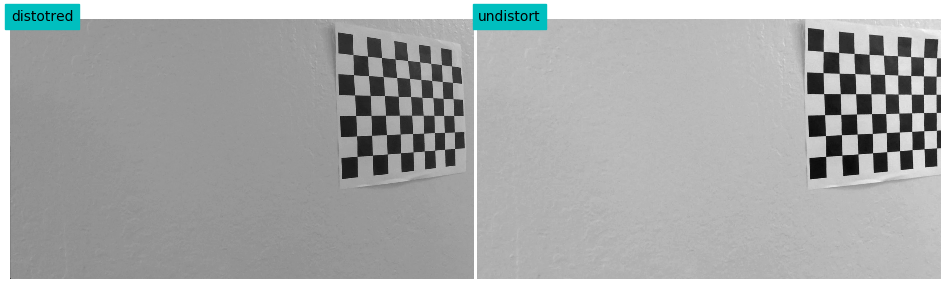

In [13]:
distotred = cv2.imread(calibration_files[7])
distotred_grey = cv2.cvtColor(distotred,cv2.COLOR_BGR2GRAY)
img_size = (distotred_grey.shape[1],distotred_grey.shape[0])
undistotred_grey = cv2.undistort(distotred_grey, calibration["mtx"], calibration["dist"], None, calibration["mtx"])
display_images(cols=2,rows=1,images=np.asarray([distotred_grey,undistotred_grey]),labels=np.asarray(['distotred','undistort']))


In [14]:
# apply a threshold on the image and returns a binary mask.
def apply_threshold(img_g,threshold=(0,255),debug=False):
    if debug : print(threshold)
    binary_mask = np.zeros_like(img_g)
    binary_mask[(img_g > threshold[0]) & (img_g <= threshold[1])] = 1
    if debug : plt.imshow(binary_mask,cmap="gray")
    return binary_mask

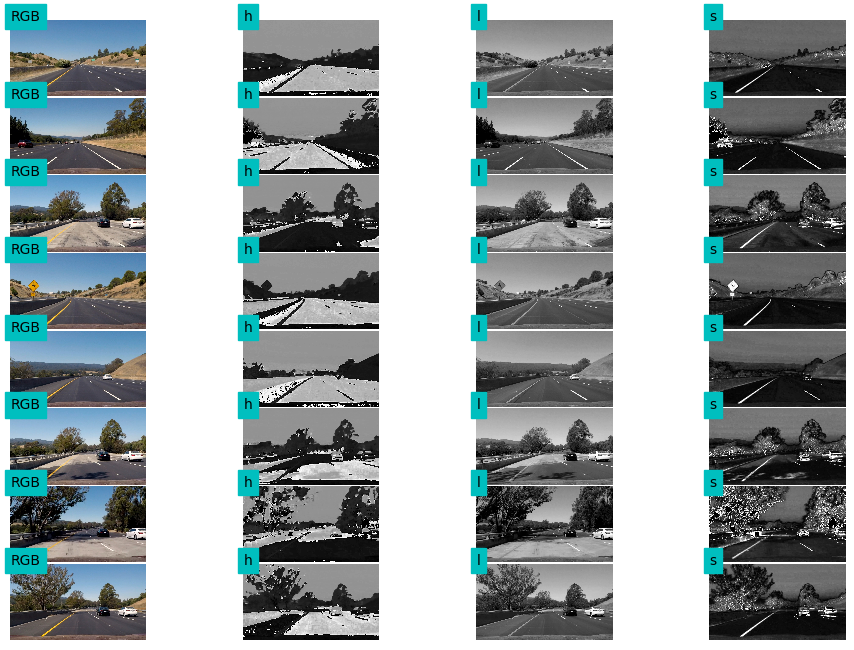

In [15]:
test_imgs = glob.glob('./test_images/*.jpg')
x = []
y = []
hls = ['h','l','s']

for path in test_imgs:
    image = mpimg.imread(path)
    
    x.append(image)
    y.append("RGB")
    
    hls_img = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    for channel in range(len(hls)):
        x.append(hls_img[:,:,channel])
        y.append(hls[channel])

display_images(len(test_imgs),4,x,y)

In [16]:
gray = cv2.cvtColor(cv2.imread(glob.glob('./test_images/*.jpg')[0]), cv2.COLOR_RGB2HLS)[:,:,2]
current_frame = cv2.imread('./test_images/test2.jpg')

(180, 255)


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

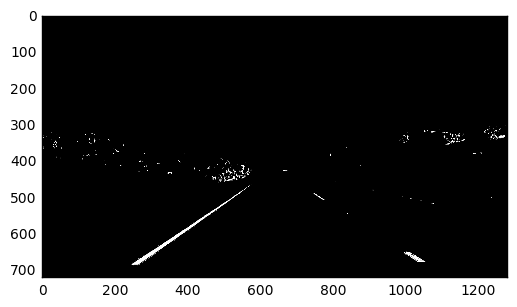

In [17]:
slider = widgets.IntRangeSlider(
    value=(180, 255),
    min=0,
    max=255,
    step=1,
    continuous_update=False,
)
gray_thresh = interact(apply_threshold,img_g=fixed(gray),threshold=slider,debug=True).widget.result


In [18]:
def abs_sobel_thresh(img, orient='x', threshold=(0,255),debug=False):
    
    thresh_min= threshold[0]
    thresh_max= threshold[1]
    
    x = 1 if orient == "x" else 0
    y = 1 if orient == "y" else 0
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray =img
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel = cv2.Sobel(gray, cv2.CV_64F, x, y)

    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)

    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # 5) Create a mask of 1's where the scaled gradient magnitude 
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    if debug : plt.imshow(binary_output,cmap="gray")

    # 6) Return this mask as your binary_output image
    return binary_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

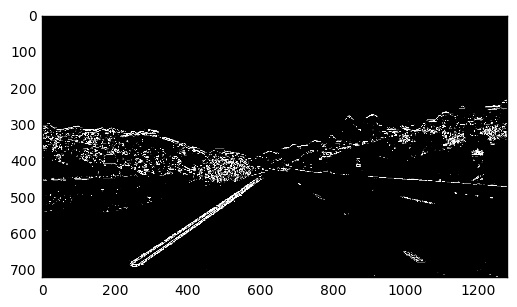

In [19]:
slider = widgets.IntRangeSlider(
    value=(20, 100),
    min=0,
    max=255,
    step=1,
    continuous_update=False,
)
gradienty = interact(abs_sobel_thresh,img=fixed(gray),orient=fixed('y'),threshold=slider,debug=True).widget.result


In [20]:
# Sobel magnitude threshold
def mag_threshold(img,sobel_kernel=3, threshold=(0,255),debug=False):
    gray = img
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= threshold[0]) & (gradmag <= threshold[1])] = 1

    if debug : plt.imshow(binary_output,cmap="gray")
    # Return the binary image
    return binary_output
   

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

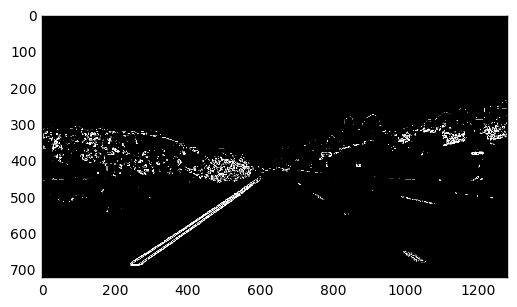

In [21]:
slider = widgets.IntRangeSlider(
    value=(30, 120),
    min=0,
    max=255,
    step=1,
    continuous_update=True,
)
kernel = widgets.IntSlider(min=1,max=31,step=2,value=3)
mag_thresh = interact(mag_threshold,img=fixed(gray),sobel_kernel=kernel,threshold=slider,debug=True).widget.result


In [22]:
# sobel directional threshold
def dir_threshold(img, sobel_kernel=3, threshold=(0, np.pi/2),debug=False):

    # Grayscale
    gray = img
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= threshold[0]) & (absgraddir <= threshold[1])] = 1

    if debug : plt.imshow(binary_output,cmap="gray")

    # Return the binary image
    return binary_output

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  1., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

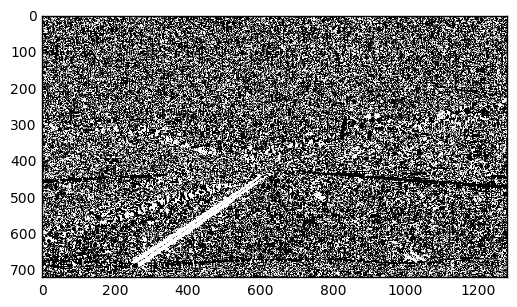

In [23]:
slider = widgets.FloatRangeSlider(
    value=(.70, 1.30),
    min=0,
    max=np.pi/2,
    step=0.1,
    continuous_update=False,
)
kernel = widgets.IntSlider(min=1,max=31,step=2,value=11)
dir_thresh = interact(dir_threshold,img=fixed(gray),sobel_kernel=kernel,threshold=slider,debug=True).widget.result


In [24]:
# window settings
window_width = 50
window_height = 80   # Break image into 9 vertical layers since image height is 720
margin = 75          # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    min_numper_of_pixels = 50
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(image[int(2*image.shape[0]/4):,:int(image.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(image[int(2*image.shape[0]/4):,int(image.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    
#     print("Left  center ", l_center)
#     print("Right center ", r_center)
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(image.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,image.shape[1]))
        left_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center + offset-margin,0))
        r_max_index = int(min(r_center + offset+margin,image.shape[1]))
        right_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        l_mask = window_mask(window_width,window_height,image,left_center,level)
        
        r_mask = window_mask(window_width,window_height,image,right_center,level)

        non_zero_left_x = (image & l_mask).nonzero()[1]
        non_zero_left_y = (image & r_mask).nonzero()[0]

         
#         when to shif the mean     
        if len(non_zero_left_x) > min_numper_of_pixels:
            l_center = left_center
            
        if len(non_zero_left_y) > min_numper_of_pixels:
            r_center = right_center

        window_centroids.append((l_center,r_center))

    return window_centroids

# window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# # If we found any window centers
# if len(window_centroids) > 0:

#     # Points used to draw all the left and right windows
#     l_points = np.zeros_like(warped)
#     r_points = np.zeros_like(warped)
#     left_x = np.array([])
#     left_y = np.array([])
#     right_x = np.array([])
#     right_y = np.array([])
        
#     # Go through each level and draw the windows 	
#     for level in range(0,len(window_centroids)):
#         # Window_mask is a function to draw window areas
#         l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
#         r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
#         # Add graphic points from window mask here to total pixels found 
#         l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
#         r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

#         left_x = np.append(left_x,(warped & l_mask).nonzero()[1])
#         left_y = np.append(left_y,(warped & l_mask).nonzero()[0])

#         right_x = np.append(right_x,(warped & r_mask).nonzero()[1])
#         right_y = np.append(right_y,(warped & r_mask).nonzero()[0])

#     # Draw the results
#     template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
#     zero_channel = np.zeros_like(template) # create a zero color channle 
#     template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
#     warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8)*255 # making the original road pixels 3 color channels
#     output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

    
# # If no window centers found, just display orginal road image
# else:
#     output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# # Display the final results
# plt.imshow(output)
# plt.title('window fitting results')
# plt.show()


In [25]:
"""
The line class si used to represent a lane line modelled as a second order polynomial.  
"""
class line():
    
    
    def __init__(self,x,y,w,h):
        """
        x - x coordinates 
        y - y coordinates
        
        w - width of the image
        h - height of the image
        
        """
        self.x = x  
        self.y = y  
        self.w = w
        self.h = h
        self.coefficients = deque(maxlen=5)
        self.fit_line(x,y)
    
    
    def x(self):
        """
        Return the x points
        """
        return self.x
        
    def y(self):
        """
        Return the y points
        """
        return self.y
    
    def fit_line(self,x,y):
        """
        Fit a second order polynomial to the points and apped the coefficients to the queue.
        """
        if (len(x) != 0 and len(y) != 0):
            if ((np.max(y) - np.min(y) > self.h * .65)) or len(self.coefficients) == 0 :
                self.coefficients.append(np.polyfit(y, x, 2)) 

    def fit_line_avg(self,line):
        """
        mere a new line into this line.
        """
        self.fit_line(line.x,line.y)

    def avg_coeff(self):
        """
        mean of the coefficients
        """
        return np.array(self.coefficients).mean(axis=0)
        
    def line(self):
        """
        generate and return a line space based on the model.
        returns x,y points.
        """
        y_linespace = np.linspace(0, self.h-1, self.h )
        coefficents = self.avg_coeff()
        line = coefficents[0]*y_linespace**2 + coefficents[1]*y_linespace + coefficents[2]
        return (np.int32(line),np.int32(y_linespace))
    
    def radius_of_curvature(self):
        """
        Calculate radius of curvature for the lane
        """
        y_meters_per_px = 27 / 720
        x_meters_per_px = 3.7 / 700 
        
        line_points = self.line()
        x = line_points[0]
        y = line_points[1]
        
        real_world_fit = np.polyfit(y * y_meters_per_px, x * x_meters_per_px, 2)
        return int(((1 + (2 * real_world_fit[0] * 720 * y_meters_per_px + real_world_fit[1]) ** 2) ** 1.5) / 
                   np.absolute(2 * real_world_fit[0]))
    
    def dist_to_camera(self):
            """
            Return the distance to camera in meters
            """
            y_meters_per_px = 27 / 720
            x_meters_per_px = 3.7 / 700 

            line_points = self.line()
            x = line_points[0]
            y = line_points[1]

            x_point = x[np.max(y)]
            print("width", self.w)
            print("lane_pos", x_point)
            return np.absolute((self.w // 2 - x_point) * x_meters_per_px)

    
    def lane_position(self):
            """
            Return the distance to camera in meters
            """
            y_meters_per_px = 27 / 720
            x_meters_per_px = 3.7 / 700 

            line_points = self.line()
            x = line_points[0]
            y = line_points[1]

            x_point = x[np.max(y)]
            return x_point

    def dump(self):
        print("Coefficient " , self.coefficents)


In [26]:
"""
Select white and yellow lane lines. 
"""
def apply_hsv_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # opencv hsv hue range is (0-179)  
    lower_white = np.array([0, 0, 220])
    upper_white = np.array([179, 255, 255])
    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    lower_yellow = np.array([20, 80, 200])
    upper_yellow = np.array([130, 255, 255])
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    mask =  mask_white | mask_yellow
    return cv2.bitwise_and(image,image,mask=mask),mask
     

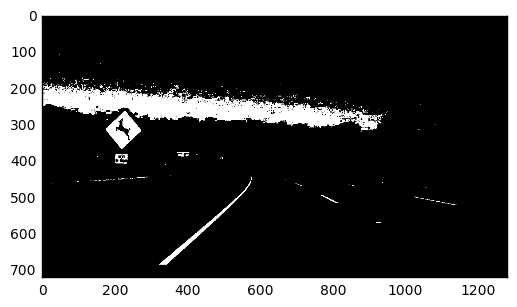

In [27]:
plt.imshow(apply_hsv_mask(current_frame)[1],cmap="gray")

In [28]:
"""
Edge Detection and Thresholding Stage
  
  * yellow and white lanes selection 
  * s channel thresholding
  * sobel absolute, sobel magnitude and sobel directional filters

image - image in BGR format
"""
def threshold_image(image):
    
    
    hls_image = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2HLS) 

    hsv_mask = apply_hsv_mask(image)[1]
    hsv_mask[:400,:] = 0 # remove the sky and the trees. not in the region of interest.

    
    # thresholding
    s_channel = hls_image[:,:,2]
    gradient_x = abs_sobel_thresh(img=s_channel,orient='x',threshold=(20,100),debug=False)
    gradient_y = abs_sobel_thresh(img=s_channel,orient='y',threshold=(20,100),debug=False)
    sobel_magnitude_threshold = mag_threshold(img=s_channel,sobel_kernel=3,threshold=(30,120),debug=False)
    sobel_directional_threshold = dir_threshold(img=s_channel,sobel_kernel=3,threshold=(.70,1.30),debug=False)
    
    # s channel threshold
    s_thresh = apply_threshold(img_g=s_channel,threshold=(180,225),debug=False)

    gradient_mask = np.zeros_like(s_channel)
    gradient_mask[((gradient_x == 1) & (gradient_y == 1)) |
           ((sobel_magnitude_threshold == 1) & (sobel_directional_threshold == 1))] = 1
    
    return  np.logical_or(hsv_mask,gradient_mask,s_thresh)


    
    

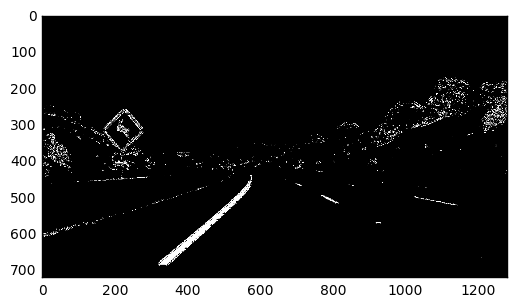

In [29]:
plt.imshow(threshold_image(current_frame),cmap="gray")

In [30]:
"""
Perspective transform - convert image to a bird's eye view 
"""
def transform(image):
    w,h = image.shape[1],image.shape[0]
    
    source = np.float32([[w // 2 - 76, h * .625], [w // 2 + 76, h * .625], [w , h], [0, h]])
    destination = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
    
    warp   = cv2.getPerspectiveTransform(source, destination)
    unwarp = cv2.getPerspectiveTransform(destination, source)


    warped = cv2.warpPerspective(image, warp, (w,h))

    return warped,unwarp


In [31]:
"""
Scan an image for lanes and return the detected lanes. 
"""
def scan_with_windows(image):
    w,h = image.shape[1],image.shape[0]
    min_numper_of_pixels = 50
    warped = image
    window_centroids = find_window_centroids(warped, window_width, window_height, margin)

    # If we found any window centers
    if len(window_centroids) > 0:


        # Points used to draw all the left and right windows
        l_points = np.zeros_like(warped)
        r_points = np.zeros_like(warped)
        left_x = np.array([])
        left_y = np.array([])
        right_x = np.array([])
        right_y = np.array([])

        # Go through each level and draw the windows 	
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
            r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)

            non_zero_left_x = (warped & l_mask).nonzero()[1];
            non_zero_left_y = (warped & l_mask).nonzero()[0]

            
            if len(non_zero_left_x) > min_numper_of_pixels: 
                left_x = np.append(left_x,non_zero_left_x)
                left_y = np.append(left_y,non_zero_left_y)

                l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255


            non_zero_right_x =(warped & r_mask).nonzero()[1]
            non_zero_right_y =(warped & r_mask).nonzero()[0]


            if len(non_zero_right_x) > min_numper_of_pixels:
                r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255
                
                right_x = np.append(right_x,non_zero_right_x)
                right_y = np.append(right_y,non_zero_right_y)



        # Draw the results
        template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
        zero_channel = np.zeros_like(template) # create a zero color channle 
        template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
        warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8)*255 # making the original road pixels 3 color channels
        output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

    # If no window centers found, just display orginal road image
    else:
        output = np.array(cv2.merge((warped,warped,warped)),np.uint8)


    left_line = line(left_x,left_y,w,h)
    right_line = line(right_x,right_y,w,h)




    return output,left_line,right_line

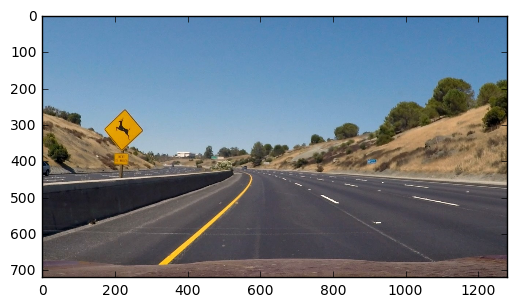

In [32]:
current_frame = cv2.imread('./test_images/test2.jpg')
# current_frame = cv2.imread('./frame_dump/frame25.png')
# current_frame = video.get_frame(t=41.9)
current_frame_orig = current_frame
w,h = current_frame.shape[1],current_frame.shape[0]
plt.imshow(cv2.cvtColor(np.copy(current_frame),cv2.COLOR_BGR2RGB),cmap="gray")

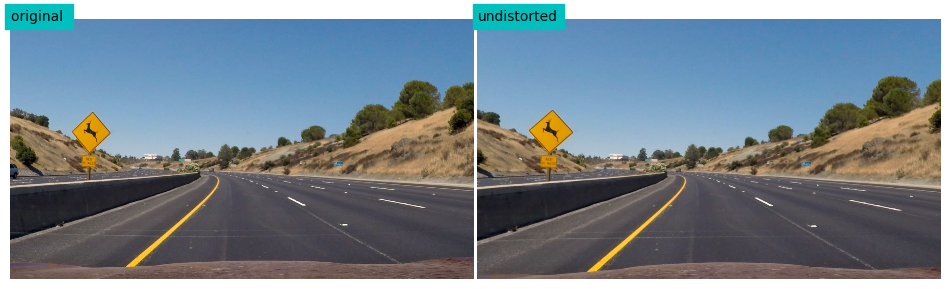

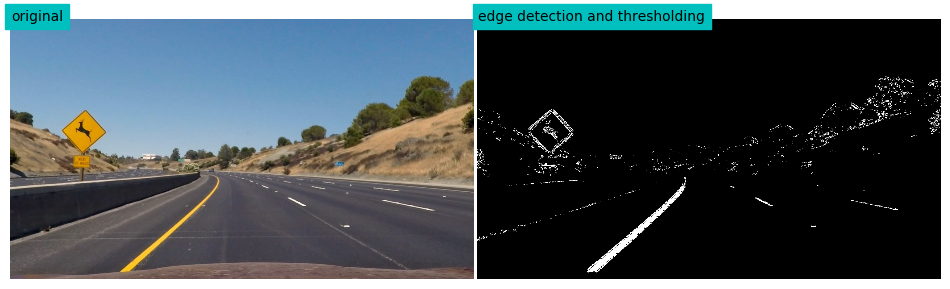

In [33]:
img_size = (current_frame.shape[1],current_frame.shape[0])
current_frame = cv2.undistort(current_frame, calibration["mtx"], calibration["dist"], None, calibration["mtx"])
processed = threshold_image(current_frame)

display_images(1,2,[cv2.cvtColor(np.copy(current_frame_orig),cv2.COLOR_BGR2RGB),
                   cv2.cvtColor(np.copy(current_frame),cv2.COLOR_BGR2RGB)],
                  ["original ", "undistorted"])

display_images(1,2,[cv2.cvtColor(np.copy(current_frame),cv2.COLOR_BGR2RGB),processed],
              ["original", "edge detection and thresholding"])

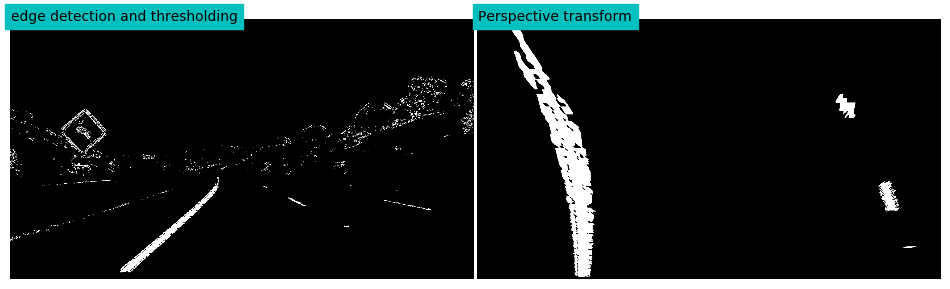

In [34]:
transofrmed,unwarp = transform(processed)
display_images(1,2,[processed,transofrmed],["edge detection and thresholding", "Perspective transform"])

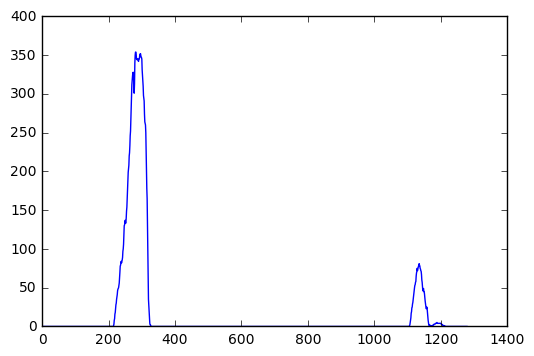

In [35]:
warped = transofrmed
l_sum = np.sum(warped[int(2*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
r_sum = np.sum(warped[int(2*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
plt.plot(np.hstack((l_sum,r_sum)))

263 439


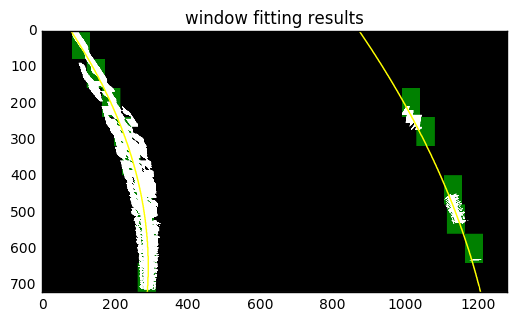

In [36]:
windows_and_lines,left_line,right_line = scan_with_windows(transofrmed)
plt.imshow(windows_and_lines)
plt.plot(left_line.line()[0], left_line.line()[1], color='yellow')
plt.plot(right_line.line()[0], right_line.line()[1], color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

print(left_line.radius_of_curvature(), right_line.radius_of_curvature())
    # Display the final results
plt.imshow(windows_and_lines)
plt.title('window fitting results')
plt.show()

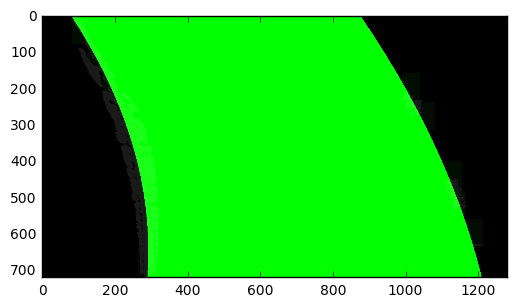

In [37]:
"""
Fill the lane bounds
"""
def fill_lanes(image,left_line,right_line):
    overlay = np.zeros_like(image)
    points = np.hstack((np.asarray(left_line.line()),np.fliplr(np.asarray(right_line.line())))).T
    cv2.fillPoly(overlay,[points],(0,255,0))
    result = cv2.addWeighted(image,.1,overlay,1,0)
    return result

lanes_filled = fill_lanes(windows_and_lines,left_line,right_line)
plt.imshow(lanes_filled)

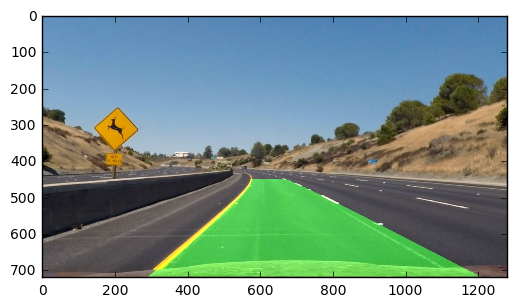

In [38]:
unwarped_img = cv2.warpPerspective(lanes_filled, unwarp, img_size)
final = cv2.addWeighted(current_frame,1,unwarped_img,.5,0)
plt.imshow(cv2.cvtColor(final,cv2.COLOR_BGR2RGB),cmap="gray")

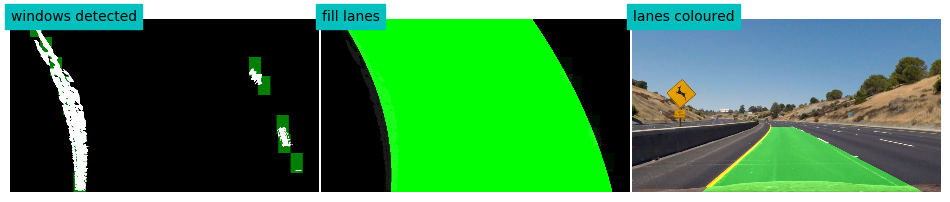

In [39]:
display_images(1,3,[windows_and_lines,lanes_filled,cv2.cvtColor(final,cv2.COLOR_BGR2RGB)],
              ["windows detected", "fill lanes", "lanes coloured"])


In [40]:
def draw_text(image, text, x, y):
    cv2.putText(image, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)


In [48]:

def pipeline(frame, convert_to_bgr = False):
    
    if convert_to_bgr:
        frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        
    current_frame = frame
    img_size = (current_frame.shape[1],current_frame.shape[0])
    
    # remove distortion
    current_frame = cv2.undistort(current_frame, calibration["mtx"], calibration["dist"], None, calibration["mtx"])

    # thresholding edge detection
    processed = threshold_image(current_frame)
    
    # prespective transform
    transofrmed,unwarp = transform(processed)
    
    # find lines by scanning 
    windows_and_lines,left_line,right_line = scan_with_windows(transofrmed)
    global left
    global right

    if left is None:
        left = left_line
    else:
        left.fit_line_avg(left_line)
        
    if right is None:
        right = right_line
    else:
        right.fit_line_avg(right_line)
    
    # calculate ROC
    roc = np.mean([left.radius_of_curvature(),right.radius_of_curvature()])    
    lanes_filled = fill_lanes(windows_and_lines,left,right)
    
    debug = cv2.resize(windows_and_lines, (0, 0), fx=0.3, fy=0.3)

    unwarped_img = cv2.warpPerspective(lanes_filled, unwarp, img_size)
    final = cv2.addWeighted(current_frame,1,unwarped_img,.5,0)
    final[:100, :, :] = frame[:100, :, :] * .4

 
    xm_per_pix = 3.7/1000 
    middle = (left_line.lane_position() + right_line.lane_position())/2
    vehicle_position = frame.shape[1]//2
    dx = (vehicle_position - middle)*xm_per_pix
    
    draw_text(final,"Radius of Curvature : " + str(roc) + " m", 40,60)
    
    draw_text(final,"Distance from Middle : " + "{0:.2f} m".format(dx), 650,60)

#     draw_text(final,"Distance Right : " + "{0:.2f} m".format(right.dist_to_camera()), 800,40)
#     draw_text(final,"Distance Left  : " + "{0:.2f} m".format(left.dist_to_camera()), 800,80)

    
    final = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)
    
    return np.hstack((windows_and_lines,final))
#     return final

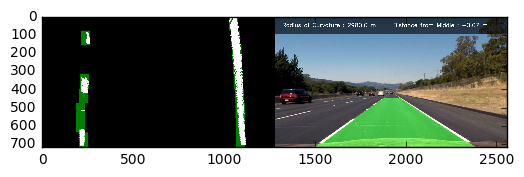

In [44]:
img = cv2.imread('./test_images/straight_lines2.jpg')
left = None
right = None
lanes_detected = pipeline(img)
plt.imshow(lanes_detected)

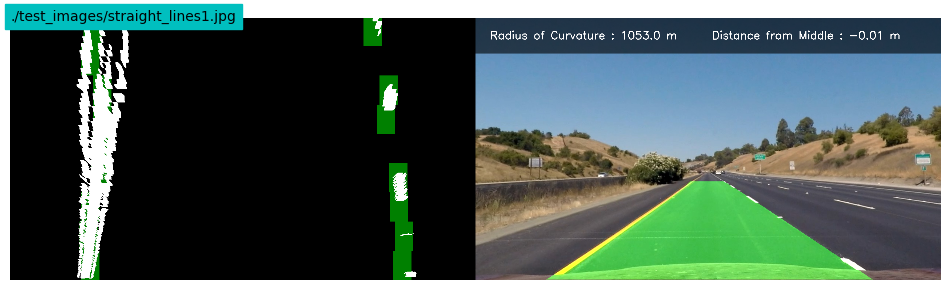

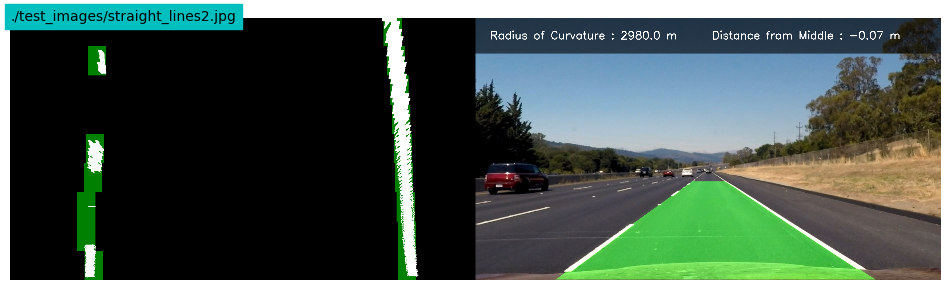

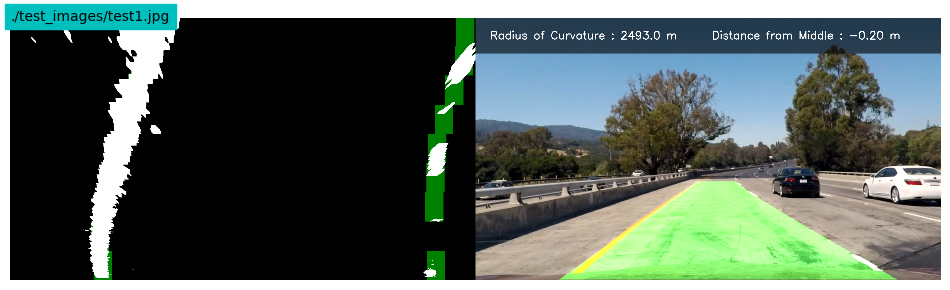

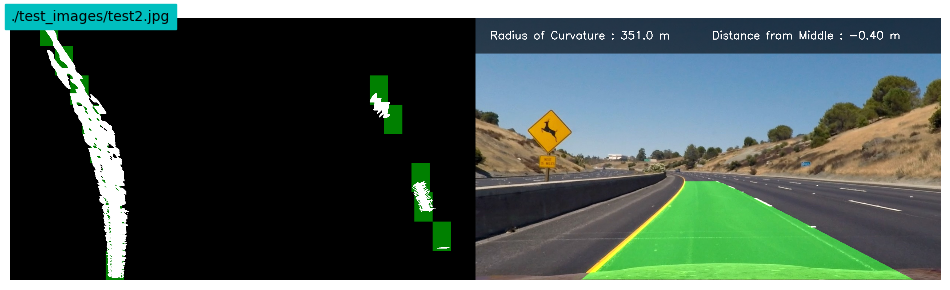

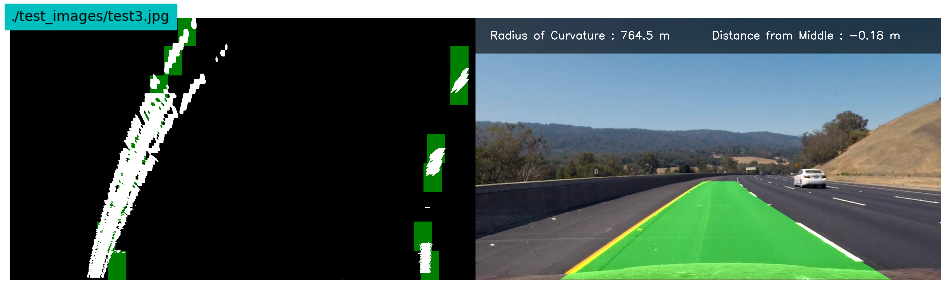

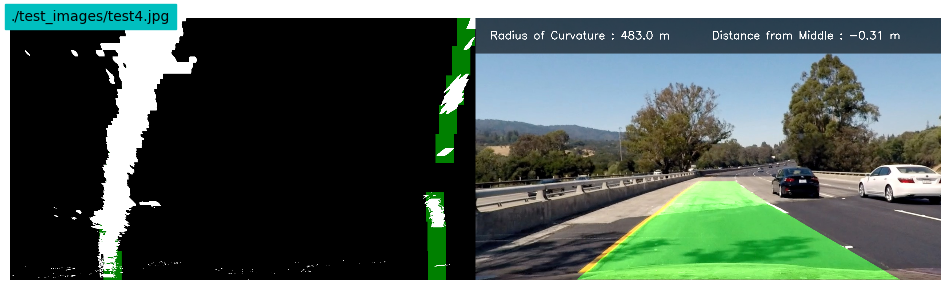

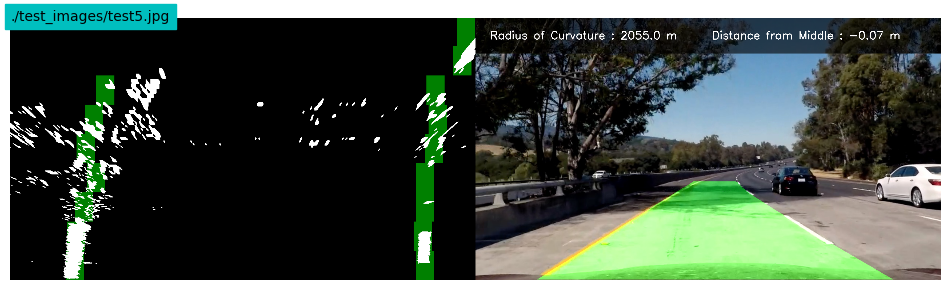

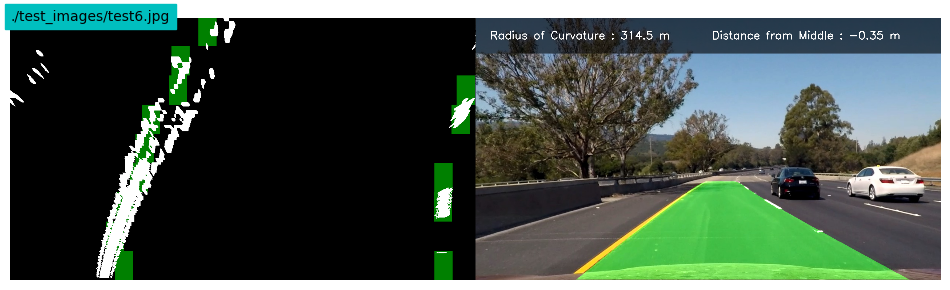

In [49]:
for file in glob.glob('./test_images/*.jpg'):
#     img = cv2.imread('./test_images/straight_lines2.jpg')
    img = cv2.imread(file)
    left = None
    right = None
    lanes_detected = pipeline(img)
    display_images(1,1,[lanes_detected],[str(file)])
    mpimg.imsave("./output_images/" + file.split('/')[1] , lanes_detected)

In [50]:
from moviepy.editor import VideoFileClip
left = None
right = None

video_output_name = 'project_video_annotated_report_1.mp4'
video = VideoFileClip("project_video.mp4",audio=False)
def video_pipeline(img):
    return pipeline(img,convert_to_bgr=True)
    
video_output = video.fl_image(video_pipeline)
%time video_output.write_videofile(video_output_name, audio=False)

[MoviePy] >>>> Building video project_video_annotated_report_1.mp4
[MoviePy] Writing video project_video_annotated_report_1.mp4


100%|█████████▉| 1260/1261 [13:36<00:00,  1.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_annotated_report_1.mp4 

CPU times: user 13min 38s, sys: 1min 38s, total: 15min 17s
Wall time: 13min 38s


In [129]:
# dump frames to disk for testing
# video = VideoFileClip("project_video.mp4",audio=False)
# for i in tqdm(range(0,50)):
#     video.save_frame("./frame_dump/frame" + str(i) + ".png" , t=i)

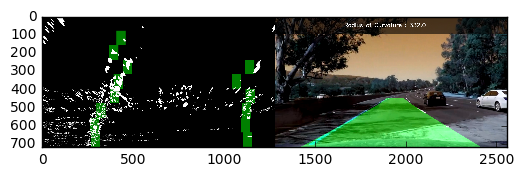

In [151]:
video = VideoFileClip("project_video.mp4",audio=False)
img = cv2.imread('./frame_dump/frame23.png')
img = video.get_frame(t=41.5)
left = None
right = None
lanes_detected = pipeline(img)
# fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(lanes_detected,cmap="gray")
